In [2]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
train_df = pd.read_csv('titanic_train.csv')

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


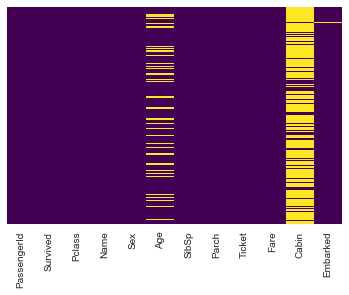

In [15]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
sns.set_style('whitegrid')

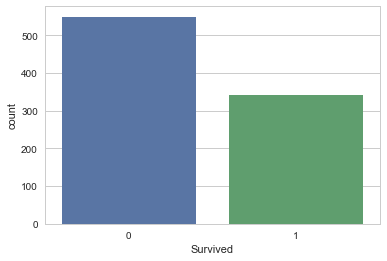

In [19]:
sns.countplot(x='Survived',data=train_df)

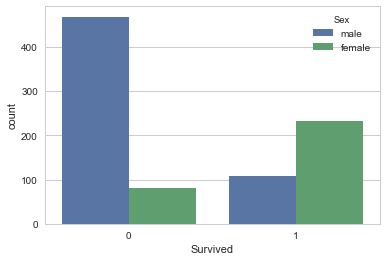

In [21]:
sns.countplot(x='Survived',hue='Sex',data=train_df)

It can be seen that Females of probability of survival is more

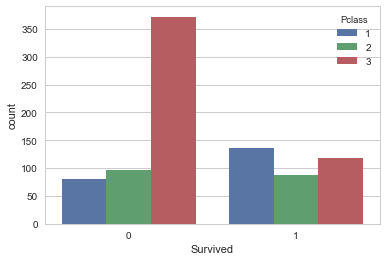

In [23]:
sns.countplot(x='Survived',hue='Pclass',data=train_df)

most of 3rd class people does'nt survive

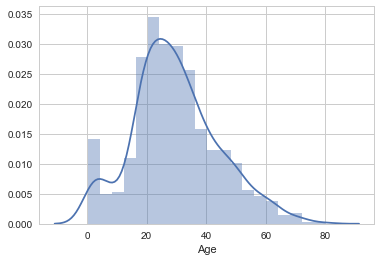

In [27]:
sns.distplot(train_df['Age'].dropna())

In [29]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


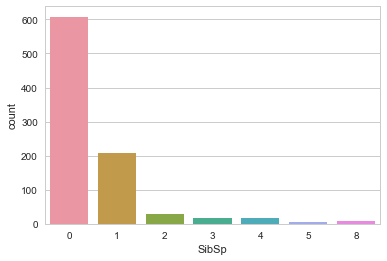

In [30]:
sns.countplot(x='SibSp',data=train_df)

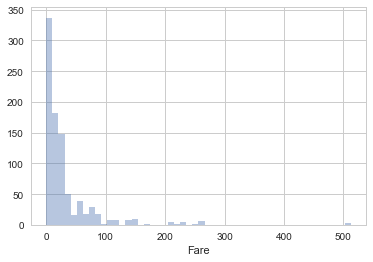

In [34]:
sns.distplot(train_df['Fare'],kde=False)

# Handling Missing data

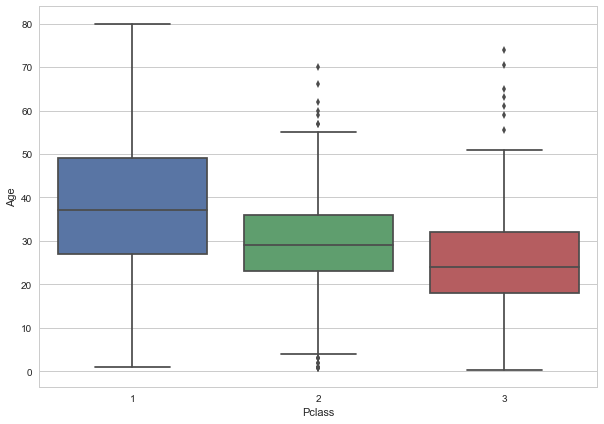

In [37]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train_df)

In [38]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 28
        elif pclass == 3:
            return 24
    else:
        return age

In [39]:
train_df['Age'] = train_df[['Age','Pclass']].apply(impute_age,axis=1)

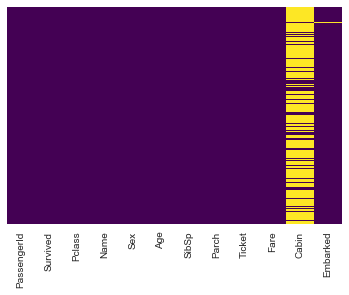

In [42]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [43]:
train_df.drop('Cabin',axis=1,inplace=True)

In [47]:
train_df.dropna(inplace=True)

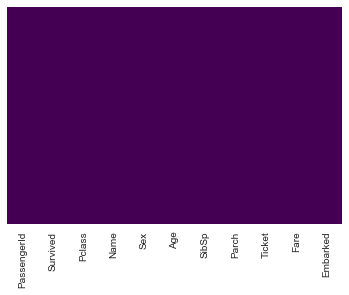

# Handling Categorical data

In [49]:
sex = pd.get_dummies(train_df['Sex'],drop_first=True)

In [50]:
embarked = pd.get_dummies(train_df['Embarked'],drop_first=True)

In [51]:
train_df = pd.concat([train_df,sex,embarked],axis=1)

In [53]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [55]:
train_df.drop(['Sex','Name','Ticket','Embarked'],axis=1,inplace=True)

In [57]:
train_df.drop('PassengerId',axis=1,inplace=True)

In [59]:
train_df.columns

Index([u'Survived', u'Pclass', u'Age', u'SibSp', u'Parch', u'Fare', u'male',
       u'Q', u'S'],
      dtype='object')

In [66]:
X = train_df[[u'Pclass', u'Age', u'SibSp', u'Parch', u'Fare', u'male',u'Q', u'S']]

In [67]:
y = train_df[[u'Survived']]

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [62]:
model = LogisticRegression()

In [69]:
model.fit(X_train,y_train)

C:\Users\salman\Anaconda2\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [70]:
predictions = model.predict(X_test)

In [73]:
from sklearn.metrics import classification_report

In [74]:
print classification_report(y_test,predictions)

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267



In [75]:
from sklearn.metrics import confusion_matrix

In [76]:
confusion_matrix(y_test,predictions)

array([[148,  15],
       [ 36,  68]])